# Problem 1 Bravyi-Kitaev Basis

Author of solution: 房伯文

In [5]:
import numpy as np

def BKmatrix_recursion(A):
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("Input must be a square matrix!")
    n = A.shape[0]

    M12 = np.zeros((n, n), dtype=int)
    M21 = np.zeros((n, n), dtype=int)
    
    ones_row = np.ones(n, dtype=int)
    M21[n-1, :] = ones_row

    # top_row = np.hstack((A, M12))
    # bottom_row = np.hstack((M21, A))

    # M = np.vstack((top_row, bottom_row))

    M = np.block([
        [A, M12],
        [M21, A]
    ])

    return M

In [ ]:
from sympy import Matrix
from IPython.display import display
import math

A = np.array([
    [1]
], dtype=int)

# Generate the BK transformation matrix
def BKmatrix_n(n):
    recursion = math.ceil(math.log2(n))
    M = A
    for i in range(recursion):
        M = BKmatrix_recursion(M)
    M = M[0:n, 0:n]
    return M

# M = BKmatrix_n(5)

# display(Matrix(A))
# display(Matrix(M))

# M_inv = np.linalg.inv(M)
# np.round(M_inv)
# display(Matrix(M_inv))

Matrix([[1]])

Matrix([
[1, 0, 0, 0, 0],
[1, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[1, 1, 1, 1, 0],
[0, 0, 0, 0, 1]])

Matrix([
[ 1.0,  0.0,  0.0, 0.0, 0.0],
[-1.0,  1.0,  0.0, 0.0, 0.0],
[ 0.0,  0.0,  1.0, 0.0, 0.0],
[ 0.0, -1.0, -1.0, 1.0, 0.0],
[ 0.0,  0.0,  0.0, 0.0, 1.0]])

In [55]:
# === Given a BK matrix, compute the maximal weight ===

def max_weight(n):
    # M is BK matrix
    # n = M.shape[0]
    # print(n)
    M = BKmatrix_n(n)

    M_inv = np.round(np.linalg.inv(M))
    M_inv = M_inv.astype(np.int64)
    M_inv = np.abs(M_inv)
    # display(Matrix(M_inv))

    ones_matrix = np.ones((n, n), dtype=np.int64)
    Pi = np.tril(ones_matrix, k=-1)  
    Parity = Pi @ M_inv
    Parity = Parity % 2

    weight = 0

    for i in range(n):
        # === bits affected by n_j ===
        v_affect = M[:, i].T

        # === parity terms ===
        v_parity = Parity[i, :]

        # === get value of n_i ===
        v_nvalue = M_inv[i, :]
        result = v_affect | v_parity | v_nvalue
        weight_i = np.sum(result)
        weight = weight_i if weight_i > weight else weight
        # print(v_affect, v_parity, v_nvalue, result)
    return weight

# max_weight(16)

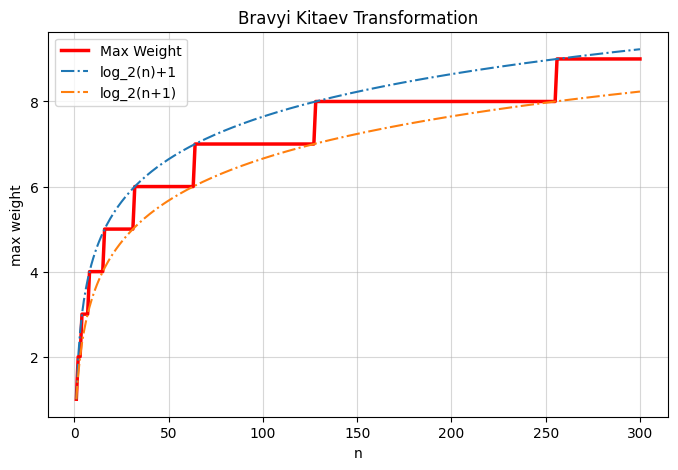

In [56]:
# === Plot the maximal weight ===
import matplotlib.pyplot as plt
X = range(1, 301)
Y = [max_weight(x) for x in X]
# Y = np.array(Y)
Log1 = [math.log2(x)+1 for x in X]
Log2 = [math.log2(x+1) for x in X]

plt.figure(figsize=(8,5))
plt.plot(X, Y, label="Max Weight", color='red', linewidth=2.5)
plt.plot(X, Log1, label='log_2(n)+1', linestyle='-.')
plt.plot(X, Log2, label='log_2(n+1)', linestyle='-.')
plt.title('Bravyi Kitaev Transformation')
plt.xlabel("n")
plt.ylabel("max weight")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.5)
plt.show()

### Result

- As the figure shows, the result the max-weight is actually $\lfloor\log_2(n)\rfloor+1$, which satisfies
$$
\log_2(n+1) \leq \lfloor\log_2(n) \rfloor+1 \leq \log_2(n)+1.
$$
This means BK basis effectively reduces the maximal-weight needed to apply a fermionic mode.

### Acknowledgement

- Due to speed limit, I only construct the experiment for $n\in\{1, 2,\ldots, 300\}$. However, it is already enough for implying the change of maximal weight regarding $n$.